<IPython.core.display.Javascript object>


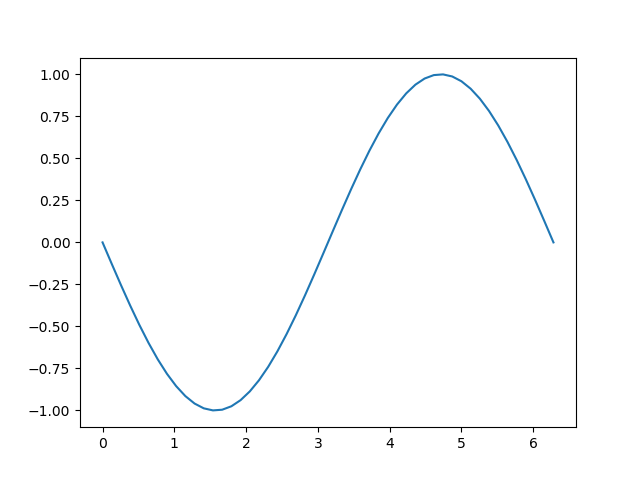

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

In [1]:
#http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);

<IPython.core.display.Javascript object>


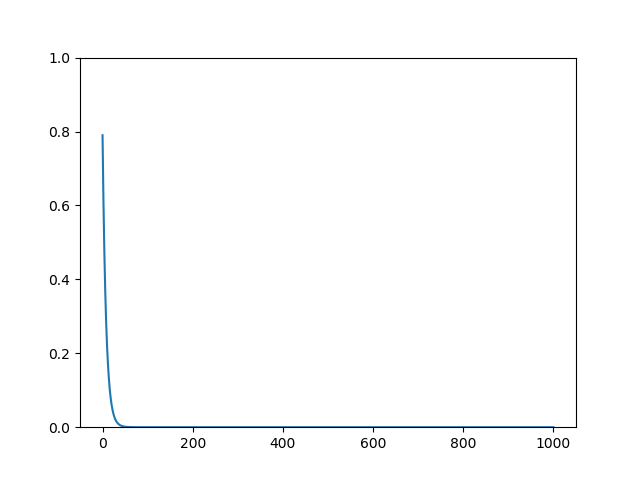

interactive(children=(FloatSlider(value=0.5, description='p0', max=1.0, step=0.01), FloatSlider(value=0.1, description='a', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.update>

In [13]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([0]*1001)
ax.set_ylim([0, 1])
#line, = ax.plot(x, np.sin(x))


#@interact(p0=(0.0,1.0,0.01), a=(0.0,1.0,0.01))
def update(p0 = 0.5, a = 0.1):
    W = [p0]
    for i in range(1000):
        W.append(W[-1]*a)
    line.set_ydata(W)
    fig.canvas.draw()
    
interact(update, p0=(0.0,1.0,0.01), a=(0.0,1.0,0.01))

<IPython.core.display.Javascript object>


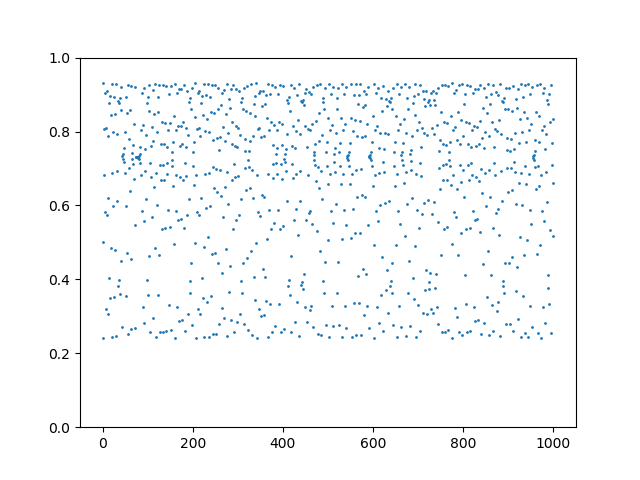

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), FloatSlider(value=0.1, description='r', max=4.0, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.update>

In [27]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([0]*1001, linestyle=" ", marker='o', markersize=1)
ax.set_ylim([0, 1])


def update(x0=0.5, r=0.1):
    X = [x0]
    for i in range(1000):
        X.append(r*X[-1]*(1-X[-1]))
    line.set_ydata(X)
    fig.canvas.draw()
    
interact(update, x0=(0.0,1.0,0.01), r=(0.0,4.0,0.01))

<IPython.core.display.Javascript object>


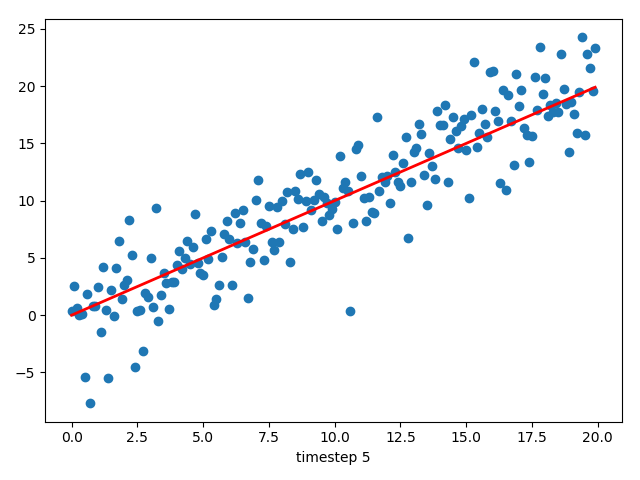

fig size: 100.0 DPI, size in inches [6.4 4.8]


In [28]:
#https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()